In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
path = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

In [3]:
Graduate_Admissions = pd.read_csv(path)

In [4]:
Graduate_Admissions

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
Graduate_Admissions.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
Graduate_Admissions.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


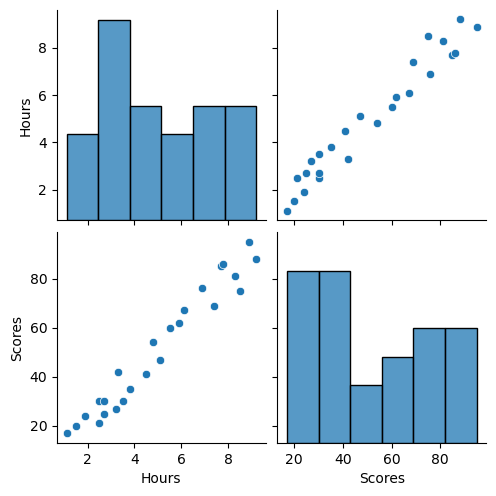

In [7]:
sns.pairplot(Graduate_Admissions)

<Axes: >

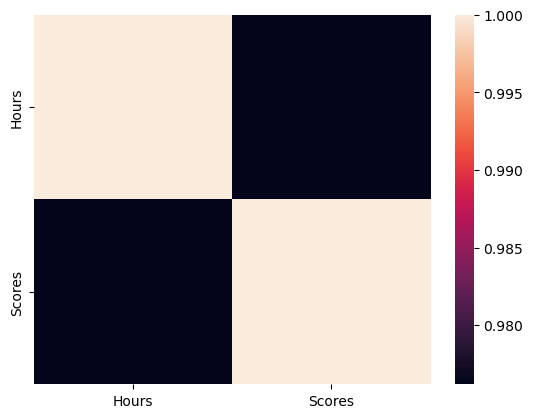

In [8]:
sns.heatmap(Graduate_Admissions.corr())

<Axes: >

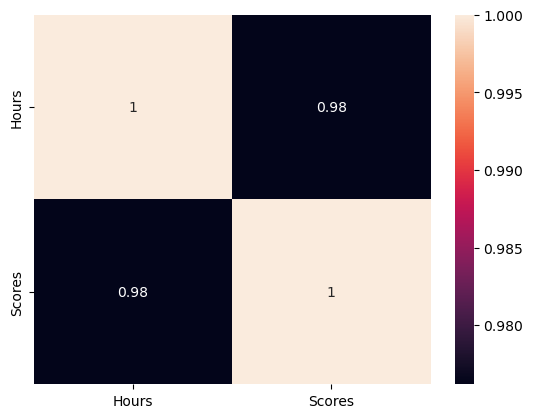

In [9]:
sns.heatmap(Graduate_Admissions.corr(), annot=True)

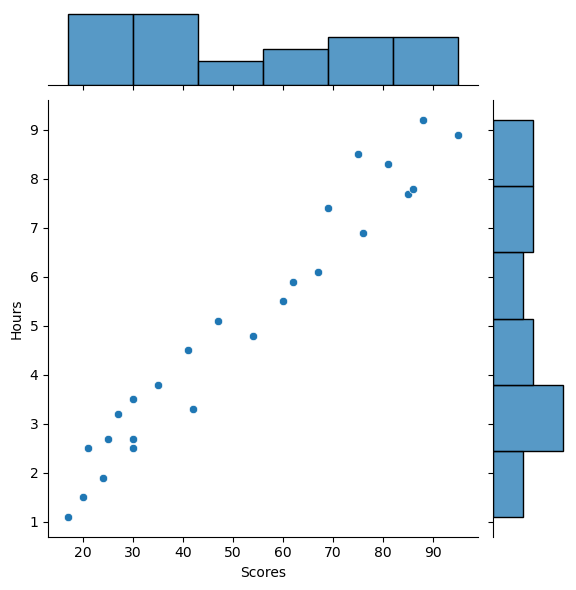

In [11]:
sns.jointplot(x="Scores", y="Hours", data=Graduate_Admissions )

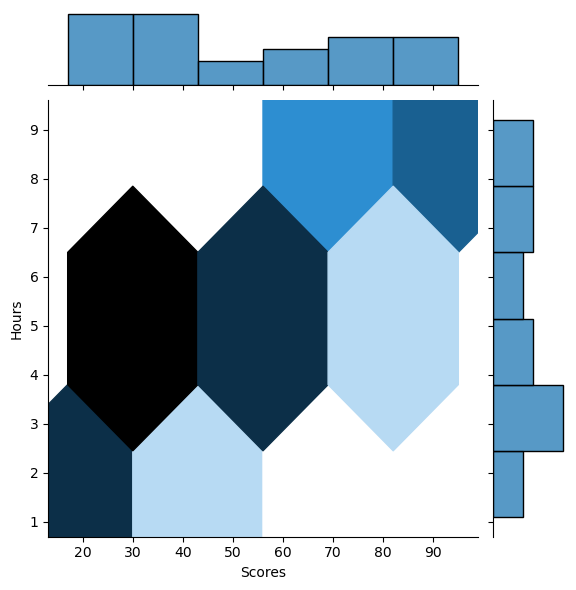

In [14]:
sns.jointplot(x="Scores", y="Hours", data=Graduate_Admissions, kind ='hex' )

In [15]:
Graduate_Admissions.columns

Index(['Hours', 'Scores'], dtype='object')

In [40]:
X = Graduate_Admissions[['Hours']]

In [41]:
y = Graduate_Admissions['Scores']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [44]:
X_train

,Hours
1,5.1
14,1.1
18,6.1
0,2.5
12,4.5
5,1.5
23,6.9
20,2.7
4,3.5
8,8.3


In [45]:
X_test

,Hours
16,2.5
10,7.7
22,3.8
19,7.4
7,5.5
21,4.8
2,3.2
3,8.5


In [46]:
y_train

1     47
14    17
18    67
0     21
12    41
5     20
23    76
20    30
4     30
8     81
13    42
9     25
15    95
24    86
6     88
17    24
11    62
Name: Scores, dtype: int64

In [47]:
y_test

16    30
10    85
22    35
19    69
7     60
21    54
2     27
3     75
Name: Scores, dtype: int64

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
lm = LinearRegression()

In [50]:
lm.fit(X_train, y_train)

LinearRegression()

In [51]:
lm.coef_

array([9.96651548])

In [52]:
pd.DataFrame(lm.coef_, X.columns, columns=['coeff'])

,coeff
Hours,9.966515


In [53]:
from sklearn import metrics

In [54]:
predictions = lm.predict(X_test)

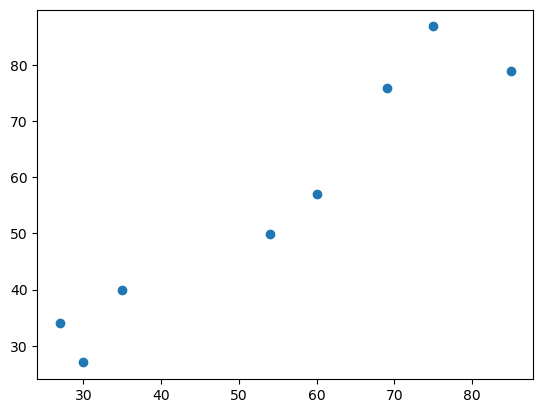

In [55]:
plt.scatter(y_test,predictions)

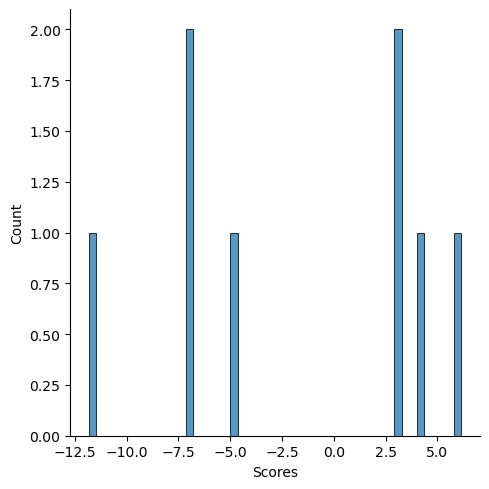

In [56]:
sns.displot((y_test-predictions),bins=50)

In [57]:
from sklearn import metrics

In [58]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 5.864954643694258
MSE: 41.63486564552886
RMSE: 6.452508476982333
